1. 프로젝트 목적 및 정의
2. 데이터셋 불러오기
3. 데이터 전처리 
4. 모델 학습
5. 모델 예측 및 평가
6. 결론

In [154]:
import numpy as np
import pandas as pd

x = np.random.uniform(0, 100, 200)
y = (10 + 2 * x) / 3
y[[23, 59, 62]] = np.nan
noise = np.random.uniform(0, 0.05, y.shape)
y = y + noise
df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('salt.csv', index = False)

## 1. 프로젝트 목적 및 정의

영희는 오늘도 소금물을 타면서 농도를 측정합니다. 영희는 매일 같은 일을 반복합니다.  
소금물은 다 먹으면 짠데 왜 매번 농도를 계산해야하는 건가요? 불쌍한 영희...    
몇십년째 소금물을 타던 영희는 지루함을 이기지 못하고 여러분께 도움을 요청합니다.  
"소금물의 농도를 구할 수 있는 방법을 알려주세요!"  
여러분은 소금물의 농도와 관련된 수학을 설명하지만 영희는 이해를 하지 못합니다.    
"아니 그래서 그걸 어떻게 나누는데요..."  
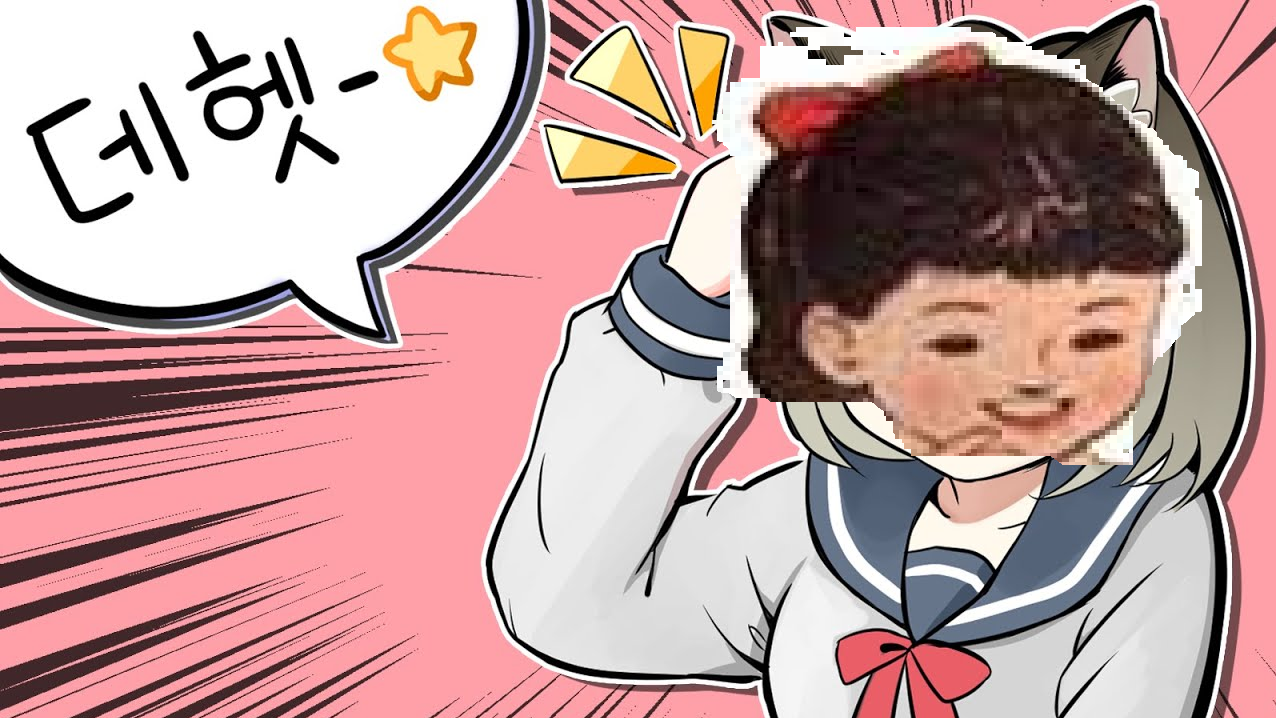  
답답한 여러분은 그럴꺼면 소금물을 모든 경우에 타보고 농도를 재는건 어떠냐고 제안합니다.  
"좋은 생각이에요! 소금물을 타는건 자신 있거든요."  

소금물 타기 고수가 된 영희는 신이 나서 당장 가서 모든 농도에 대해 소금물을 타왔습니다.  
"자, 여기 농도 10% 소금물 100g과 농도 x% 소금물 200g이 섞였을때의 소금물의 농도 y를 기록해왔어요"  
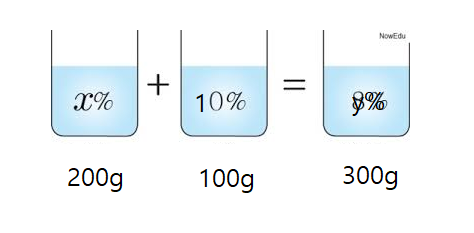  
여러분은 이제 영희가 준 데이터를 이용해 두번째 소금물의 농도 $x$가 주어졌을 때, 섞인 소금물의 농도 $y$를 예측해보려고 합니다. 코딩을 잘하는 여러분들이 영희를 도와 소금물의 농도를 예측해볼까요?

## 2. 데이터셋 불러오기

### 예제 1.
영희가 전달해준 `salt.csv`를 pandas로 불러와서 확인해볼까요?
* 데이터의 앞부분 5개를 살펴보아요. `df.head` 함수를 사용하면 데이터의 앞부분을 반환해줘요

In [155]:
import pandas as pd # ㅔpandas 라이브러리를 불러옵니다. 관례적으로 pd라는 별칭을 사용합니다.

df = pd.read_csv('salt.csv')
# salt.csv 파일을 불러와서 df라는 이름의 데이터 프레임에 저장하기
df.head() # 데이터의 앞부분을 출력한다

,x,y
0,19.258376,16.221620
1,85.280136,60.191798
2,16.840522,14.589154
3,88.181196,62.168068
4,74.338543,52.941530


## 3. 데이터 전처리 및 시각화

### 예제 2.
여러분이 데이터를 불러오던 중, 영희에게서 갑작스레 연락이 왔습니다.  
자신이 소금물을 섞다가 깜빡 잠이 든 나머지 몇가지 데이터를 빼먹었다고 하네요.  
데이터에서 빈 값을 찾아내 제거합시다!

In [156]:
print(df.isnull()) # 데이터 프레임의 isnull() 함수를 사용하여 각각의 데이터가 비어있는 경우에는 True를, 그렇지 않은 경우에는 False를 출력한다.
print(df.isnull().sum()) # 열 마다 빈 값이 있는지 확인하기
df_new = df.dropna() # 빈 값이 포함된 행 삭제하기
print(df_new.isnull().sum()) # 제대로 제거가 되었는지 확인하기

         x      y
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
195  False  False
196  False  False
197  False  False
198  False  False
199  False  False

[200 rows x 2 columns]
x    0
y    3
dtype: int64
x    0
y    0
dtype: int64


### 예제 3.
여러분은 불러온 데이터의 정보를 확인하려고 합니다. 1) 각 column의 이름 2) 각 column 별 평균과 분산과 최소 최댓값을 구하려고 합니다.  
어떤 식으로 코드를 짜야할까요?

In [157]:
print('describe')
print(df_new.describe())
print('\ninfo')
print(df_new.info())

describe
                x           y
count  197.000000  197.000000
mean    50.573374   37.073874
std     28.909599   19.272620
min      0.520678    3.699267
25%     23.871974   19.290703
50%     51.010348   37.367794
75%     75.124541   53.440985
max     99.668803   69.782445

info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       197 non-null    float64
 1   y       197 non-null    float64
dtypes: float64(2)
memory usage: 4.6 KB
None


### 예제 4.
여러분은 불러온 데이터가 어떤 식으로 분포되어 있는지 산점도를 그려보려고 합니다. 어떤 식으로 코드를 짜야 할까요?

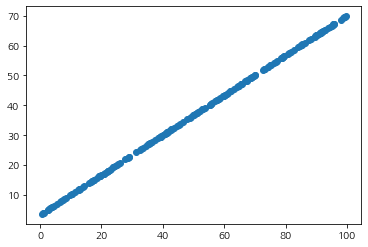

In [158]:
import matplotlib.pyplot as plt

x = df_new['x'] # data의 x값 확인하기
y = df_new['y'] # data의 y값 확인하기
plt.scatter(x=x, y=y) # data의 x값과 y값을 사용해 산점도 그리기

## 4. 모델 학습

### 핵심 알고리즘 소개 - 선형 회귀

이번 학습에서 사용할 모델은 선형회귀이다. 회귀 문제에서는 데이터의 특성으로부터 레이블의 값을 예측하는 관계를 찾는다.  
선형회귀는 데이터와 그 레이블의 관계가 다음의 선형식을 따른다고 가정한다.  
<center>$y = ax + b$</center>
수많은 x와 y가 주어졌을 때, 우리는 a와 b의 값을 역으로 추정할 수 있다. a와 b의 값을 역으로 추정하는 과정은 다음과 같다.

1. 초기 추세선을 설정한다.  
* a와 b를 무작위로 정한다.
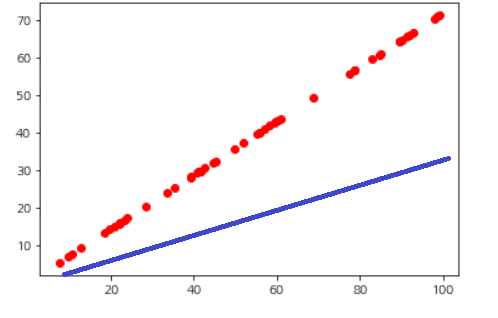
2. 추세선이 틀린 정도를 계산한다.  
* 데이터를 골라 선택된 데이터에 대해 오차를 계산한다. 여기서는 제곱 오차를 이용한다.
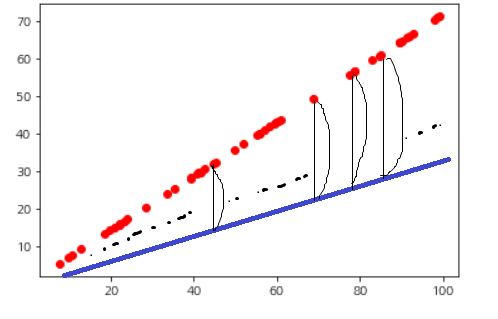
3. 오차가 줄어드는 방향으로 모델을 조정한다  
* 오차가 줄어들도록 a와 b를 일정한 폭으로 조정한다.  
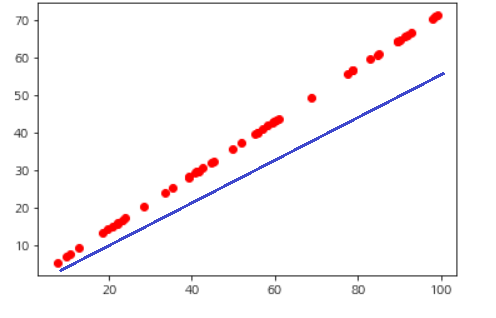
4. 2~3단계를 반복한다.  
* 추세선을 조정하는 작업을 정해진 횟수만큼 반복한다.  
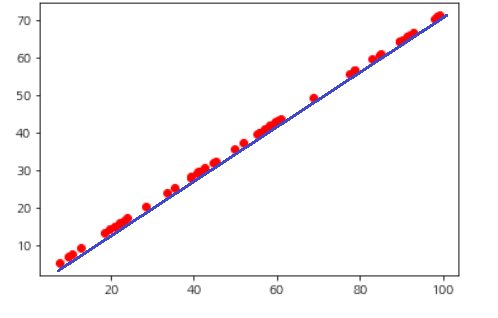

### 예제 5.
산점도를 그린 여러분은 x와 y가 선형의 관계를 가지고 있다는 것을 눈치챘습니다. 이에 따라 선형 회귀를 모델로 사용하려고 합니다.  
먼저 모델을 학습하기 위해 입력 데이터와 결과 레이블을 별도로 저장해볼까요? 그 뒤 저장한 입력 데이터와 결과 레이블의 모양을 출력해보세요.

In [223]:
import numpy as np
X = np.array(df_new['x'])
y = np.array(df_new['y'])
print(X.shape)
print(y.shape)

(197,)
(197,)


### 예제 6.
데이터를 학습을 위한 훈련 데이터와 성능 측정을 위한 테스트 데이터로 나눠주세요. 나눠진 훈련 데이터와 테스트 데이터의 모양 또한 출력해주세요!

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147,)
(50,)
(147,)
(50,)


### 예제 7.
훈련 데이터를 사용해서 모델을 훈련시켜주세요.
* 주의: 훈련이 가능하도록 다음과 같이 데이터 모양을 변형해야 합니다.
```python
X_train = np.reshape(X_train, (-1, 1))
```

In [215]:
from sklearn.linear_model import SGDRegressor

X_train = np.reshape(X_train, (-1, 1))
model = SGDRegressor(loss = 'squared_loss', max_iter = 100, eta0 = 0.0001)
model.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, loss='squared_loss', max_iter=100)

## 5. 모델 예측 및 평가

### 예제 8.
테스트 데이터를 사용해서 모델의 예측값을 출력하고, 이를 파란색의 직선으로 그려주세요. 기존의 테스트 데이터는 빨간색의 산점도로 그려주세요.
* 주의: 예측이 가능하도록 다음과 같이 데이터 모양을 변형해야 합니다.
```python
X_test = np.reshape(X_test, (-1, 1))
```

[29.83636546 15.85301539 43.3270825  29.52370083 37.3539813  59.48551444
 24.02163269 42.82490084 64.73453763 39.73516097 35.82832574 28.17886549
 16.75688113 20.51772009 40.00494031 32.05279379 30.679562   65.5077227
 32.50307892  7.64628195 66.00903209 13.33954332  5.42274218 71.18308022
 14.21919888 28.24122571 43.68543755 29.33977474 60.75713781 17.20858374
 64.22461559 61.07205191 64.20561372 56.49583985 70.77295996 55.55338723
 41.84621938 40.10620936  9.29143704  7.03472536 40.87921525 15.94319613
 49.44009779 25.3735078  56.50533051 29.73861147 70.32345188 66.66651648
 42.75414607 14.9272061 ]


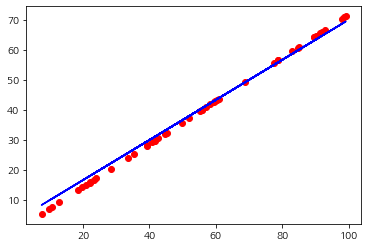

In [222]:
X_test = np.reshape(X_test, (-1, 1))
y_pred = model.predict(X_test)
print(y_pred)
plt.plot(X_test, y_test, c='b')
plt.scatter(X_test, y_pred, c='r')

### 예제 9.
훈련시킨 모델이 잘 예측하는지를 확인하기 위해서 점수를 측정해주세요.

In [218]:
model.score(X_test, y_test)

0.9931314006738907

## 6. 결론

그렇게 영희는 여러분이 전달해준 모델을 가지고 소금물이 어떤 농도를 가질지 매번 예측할 수 있었답니다. ^0^  
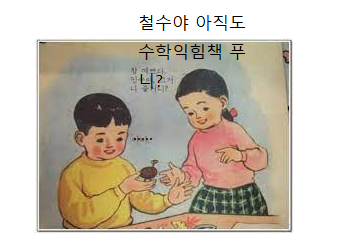